# Zyfra. 
Soluciones de eficiencia para la industria pesada.

# Predicción de recuperación de oro

## Objetivo
Preparar un prototipo de un modelo de ML que pueda predecir la cantidad de oro extraído del mineral de oro.

El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

## 1 Preparar los datos

### 1.0 Cargar librerías

In [1]:
# Cargar librerías que vamos a usar e todo el proyecto
# Librerías estándar
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y métricas
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', None)

print('Librerías importadas correctamente.')

Librerías importadas correctamente.


### 1.1 Abrir los archivos y examinar los datos
vamos a porceder a:
- Cargar los tres datasets ( gold_recovery_train.csv, gold_recovery_test.csv, gold_recovery_full.csv) usando pandas.
- Realizar un examen inicial de cada DataFrame:
    - df.head()para ver las primeras filas.
    - df.info() para revisar tipos de datos, valores no nulos y uso de memoria.
    - df.describe()para estadísticas descriptivas.
    - Verificar si la columna date está configurada como índice y si es de tipo datetime.

In [2]:
# Rutas de acceso a los archivos
path_train = '/datasets/gold_recovery_train.csv'
path_test = '/datasets/gold_recovery_test.csv'
path_full = '/datasets/gold_recovery_full.csv'

# CArgar los datsets
try:
    train = pd.read_csv(path_train, index_col='date', parse_dates=['date'])
    test = pd.read_csv(path_test, index_col='date', parse_dates=['date'])
    full = pd.read_csv(path_full, index_col='date', parse_dates=['date'])
except FileNotFoundError as e:
    print(f'Error: {e}. Asegúrate de que los archivos CSV estén en la ruta correcta.')
    

In [3]:
# Función para hacer el examen incial de un DAtaFRame
def examination_df(df, name_df):
    """
    Realiza un examen inicial de un DataFrame, mostrando sus primeras filas,
    información general, estadísticas descriptivas y forma.

    Args:
        df (pd.DataFrame): El DataFrame a examinar.
        nombre_df (str): El nombre del DataFrame (para la impresión).
    """
    print(f'\n**** Examen inicial de {name_df} ****')
    print('Primeras 5 filas:')
    display(df.head(5))
    print('\nInformación general (dtypes, non-nulls): ')
    df.info()
    print('\nEstadísticas descriptivas:')
    print(df.describe().T) # Transponer la tabla para mejor lgibilidad
    print(f'\nForma del dataset (filas, columnas): {df.shape}')
    print(f'\nValores nulos por columna (porcentaje):')
    print((df.isna().sum() / len(df) * 100).sort_values(ascending=False).head(10)) # 10 columnas con más nulos


In [4]:
# Aplicar función a train
examination_df(train, 'train')



**** Examen inicial de train ****
Primeras 5 filas:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-4


Información general (dtypes, non-nulls): 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8 

**Análisis inicial del conjunto de datos de entrenamiento (train)**
- **Primeras 5 filas (head()):** Muestran una gran variedad de características numéricas, lo que sugiere que el conjunto de datos contiene mediciones de diferentes etapas del proceso de extracción de oro (final.output, primary_cleaner, rougher, secondary_cleaner, rougher.calculation, rougher.input, rougher.output, rougher.state, secondary_cleaner.output, secondary_cleaner.state). La columna date está configurada como el índice, lo que es apropiado para datos de series de tiempo.

- **Información general (info()):**

    - El dataframe contiene 16860 entradas y 86 columnas.
    - Todas las columnas son de tipo float64, lo que indica que no hay problemas inmediatos de tipos de datos incorrectos que requieran conversión.
    - Existen numerosos valores no nulos en la mayoría de las columnas, pero también hay una cantidad significativa de valores ausentes en muchas de ellas.


- **Estadísticas descriptivas (describe()):**

    - Los valores mínimos de algunas columnas (final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, entre otras) son 0.00. Esto podría indicar problemas en los datos (ej., errores de medición o valores perdidos rellenados con cero) o que la concentración de ciertos materiales puede ser cero en algunos puntos. Esto deberá ser investigado.
    - La columna final.output.recovery tiene una media de 67.21% y un máximo de 100.00%, mientras que el mínimo es 0.00%. Estos son los valores que se deben predecir.
    - Algunas columnas de state (ej., secondary_cleaner.state.floatbank5_a_level, secondary_cleaner.state.floatbank5_b_level, secondary_cleaner.state.floatbank6_a_level) tienen valores mínimos negativos (e.g, -799.74, -800.26, -810.47), que podrían indicar niveles, no concentraciones de sustancias.

- Valores nulos (isnull().sum().sort_values(ascending=False)):

    - Las columnas con el mayor porcentaje de valores nulos son rougher.output.recovery (15.26%), rougher.output.tail_ag (13.35%), rougher.output.tail_sol (13.34%) y rougher.output.tail_au (13.34%).
    - En general, hay una considerable cantidad de valores nulos en el conjunto de datos de entrenamiento, lo que requerirá una estrategia de imputación (e.g., rellenar con valores previos, media, etc.) durante el preprocesamiento de datos.

In [5]:
# Aplicar función a test
examination_df(test, 'test')



**** Examen inicial de test ****
Primeras 5 filas:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86



Información general (dtypes, non-nulls): 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primar

**Análisis inicial del conjunto de datos de prueba (df_test)**

- **Estadísticas descriptivas (describe()):**

    - Similar al conjunto de entrenamiento, algunas columnas tienen valores mínimos de 0.00, lo que también merece investigación.
    - Los valores min, max, mean, std para las columnas presentes en el conjunto de prueba parecen estar en un rango similar a las del conjunto de entrenamiento.


- **Valores nulos (isna().sum().sort_values(ascending=False)):**

  - Las columnas con el mayor porcentaje de valores nulos son rougher.input.floatbank11_xanthate (6.03%), primary_cleaner.input.sulfate (5.16%) y primary_cleaner.input.depressant (4.85%).
  - Al igual que en el conjunto de entrenamiento, hay valores nulos, aunque el porcentaje de valores nulos es generalmente menor en el conjunto de prueba en comparación con el conjunto de entrenamiento.

In [6]:
# Aplicar función a full
examination_df(full, 'full')



**** Examen inicial de full ****
Primeras 5 filas:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-4


Información general (dtypes, non-nulls): 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8 

**Análisis inicial del conjunto de datos completo (full)**
- Forma del dataset: El full tiene 22716 filas y 86 columnas. Esto es consistente con la suma de las filas en train y test, y el número de columnas de train.
- Tipos de datos y valores no nulos: Todas las columnas son de tipo float64. Existen valores nulos en varias columnas, siendo rougher.output.recovery, rougher.output.tail_ag, rougher.output.tail_sol, rougher.output.tail_au y rougher.input.floatbank11_xanthate las que presentan el mayor porcentaje de nulos.
- Estadísticas descriptivas: Similar a los otros conjuntos, algunas columnas tienen valores mínimos de 0.00, se debe tener precaución en la modelación.

**Comparación entre los conjuntos de datos de entrenamiento (train) y de prueba (test)**

Columnas faltantes en el conjunto de prueba: El conjunto de datos de prueba (test) tiene 52 columnas, mientras que el conjunto de datos de entrenamiento (train) tiene 86 columnas. Esto significa que el conjunto de prueba carece de columnas relacionadas con los parámetros de salida (output) y los parámetros de cálculo (calculation). Esto es importante porque las características de salida no deben estar disponibles para el modelo durante la predicción en el conjunto de prueba.

Valores nulos: Ambos conjuntos de datos tienen valores nulos. La imputación de estos valores será un paso crucial en el preprocesamiento de datos.

Discrepancias en valores mínimos: Es crucial investigar porqué algunas columnas tienen un valor mínimo de 0.00. Esto podría ser un valor válido o podría indicar un problema.

En general, ambos conjuntos de datos parecen estar listos para el preprocesamiento después de abordar los valores nulos y comprender las implicaciones de los valores mínimos de cero.

### 1.2 Comprabación del Cálculo de la Recuperación
- Calcular la recuperación para la característica rougher.output.recoveryen el conjunto de entrenamiento ( gold_recovery_train.csv). **Fórmula de Recuperación**: Recuperación = ((C × ( F − T )) / (F × ( C − T ))) × 100%.
    * C: Concentración del oro en el concentrado (rougher.output.concentrate_au)
    * F: Concentración del oro en la alimentación (rougher.input.feed_au)
    * T: Concentración del oro en las colas (rougher.output.tail_au)
- Calcular el Error Absoluto Medio (MAE) entre los valores calculados y los valores existentes en rougher.output.recoveryel dataset de entrenamiento.
- Reportar el MAE (un MAE muy bajo indicaría que la fórmula se aplica correctamente).

In [7]:
# Definir la función para calcular la recuperación
def calculate_recovery(C, F, T):
    """
    Calcula la recuperación del metal a partir de las concentraciones.

    Args:
        C (pd.Series): Concentración del metal en el concentrado.
        F (pd.Series): Concentración del metal en la alimentación.
        T (pd.Series): Concentración del metal en las colas.

    Returns:
        pd.Series: El valor de recuperación calculado.
    """
    # Evitar división por cero añadiendo un pequeño epsilon o manejando los casos donde el denominador es cero.
    # Los valores donde F o (C-T) son cero resultarán en NaN/Inf.
    # Para el cálculo del MAE, es importante que los NaNs se manejen consistentemente.
    # Filtrar solo las filas donde el denominador no es cero para un cálculo válido.
    
    # Manejar el caso de F=0 para evitar división por cero en F
    denominator = (F * (C - T))
    
    # Crear una serie para la recuperación y llenarla con NaN por defecto
    recovery_calculated = pd.Series(np.nan, index=C.index)
    
    # Identificar filas donde el denominador no es cero y F no es cero
    valid_indices = (denominator != 0) & (F != 0)
    
    # Calcular la recuperación solo para los índices válidos
    recovery_calculated[valid_indices] = (C[valid_indices] * (F[valid_indices] - T[valid_indices])) / \
                                         (F[valid_indices] * (C[valid_indices] - T[valid_indices])) * 100

    return recovery_calculated


In [8]:
# Extraer las columnas necesarias del DataFrame de entrenamiento
# rougher.output.concentrate_au (C)
# rougher.input.feed_au (F)
# rougher.output.tail_au (T)
# rougher.output.recovery (valor real)

C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']

recovery_real = train['rougher.output.recovery']

# Calcular la recuperación usando nuestra función
recovery_calculated = calculate_recovery(C, F, T)

# Comparar los valores calculados con los valores reales
# Es crucial alinear los DataFrames por el índice (fecha/hora) para la comparación
# Además, solo compararemos donde ambos, el valor real y el calculado, no sean NaN.
# Esto asegura que no se incluyan filas con datos incompletos en el MAE.
comparison_df = pd.DataFrame({
    'recovery_real': recovery_real,
    'recovery_calculated': recovery_calculated
}).dropna() # Eliminar filas donde hay NaNs en cualquiera de las columnas para la comparación

# Calcular el Error Absoluto Medio (MAE)
# Solo usamos las filas con valores válidos en ambos para el cálculo del MAE
mae = mean_absolute_error(comparison_df['recovery_real'], comparison_df['recovery_calculated'])

print(f"Error Absoluto Medio (MAE) entre la recuperación calculada y la recuperación real: {mae:.10f}")

# Mostrar algunas comparaciones para verificar visualmente
print("\nAlgunas comparaciones entre recuperación real y calculada (primeras 5 filas):")
print(comparison_df.head())

if mae < 0.1: # Un umbral bajo para considerar que el cálculo es correcto
    print("\nEl MAE es muy bajo, lo que confirma que el cálculo de la recuperación es correcto.")
else:
    print("\nEl MAE es alto, lo que sugiere que hay una discrepancia significativa en el cálculo de la recuperación.")

Error Absoluto Medio (MAE) entre la recuperación calculada y la recuperación real: 0.0000000000

Algunas comparaciones entre recuperación real y calculada (primeras 5 filas):
                     recovery_real  recovery_calculated
date                                                   
2016-01-15 00:00:00          87.11                87.11
2016-01-15 01:00:00          86.84                86.84
2016-01-15 02:00:00          86.84                86.84
2016-01-15 03:00:00          87.23                87.23
2016-01-15 04:00:00          86.69                86.69

El MAE es muy bajo, lo que confirma que el cálculo de la recuperación es correcto.


Un valor tan bajo para el MAE confirma que el cálculo de la recuperación se ha realizado correctamente.

### 1.3 Análisis de Características No Disponibles en el Conjunto de Prueba. 
- Identificar las columnas presentes en el conjunto de entrenamiento ( gold_recovery_train.csv) pero ausentes en el conjunto de prueba ( gold_recovery_test.csv).
- Listar estas características y describir su tipo (objetivo, características de etapa intermedia, etc.). 

In [9]:
# Columnas que están en train pero no en test
def missing(df_train, df_test):
    missing_in_test = df_train.columns.difference(df_test.columns)
    missing_in_test = missing_in_test.sort_values()

    print(f'Columnas presentes en train pero ausentes en test ({len(missing_in_test)})')
    for col in missing_in_test:
        print(f'- {col}')
    return

print(missing(train, test))

Columnas presentes en train pero ausentes en test (34)
- final.output.concentrate_ag
- final.output.concentrate_au
- final.output.concentrate_pb
- final.output.concentrate_sol
- final.output.recovery
- final.output.tail_ag
- final.output.tail_au
- final.output.tail_pb
- final.output.tail_sol
- primary_cleaner.output.concentrate_ag
- primary_cleaner.output.concentrate_au
- primary_cleaner.output.concentrate_pb
- primary_cleaner.output.concentrate_sol
- primary_cleaner.output.tail_ag
- primary_cleaner.output.tail_au
- primary_cleaner.output.tail_pb
- primary_cleaner.output.tail_sol
- rougher.calculation.au_pb_ratio
- rougher.calculation.floatbank10_sulfate_to_au_feed
- rougher.calculation.floatbank11_sulfate_to_au_feed
- rougher.calculation.sulfate_to_au_concentrate
- rougher.output.concentrate_ag
- rougher.output.concentrate_au
- rougher.output.concentrate_pb
- rougher.output.concentrate_sol
- rougher.output.recovery
- rougher.output.tail_ag
- rougher.output.tail_au
- rougher.output.tai

__Hallazgos:__

- Estas columnas no están disponibles en test porque se calculan después del proceso, o son objetivos del modelo, no entradas.

- En su mayoría pertenecen a:

    - rougher.output.* salidas del proceso rougher

    - final.output.* salidas finales

    - rougher.calculation.* columnas derivadas
 
**Implicación para el modelo:**
- Estas columnas no se pueden usar como features para entrenar el modelo, porque no estarán disponibles al predecir.

- Solo deben utilizarse como objetivos (targets) durante entrenamiento (cuando estén disponibles).



### 1.4 Preprocesamiento de datos
- Manejar los valores ausentes.
- Analizar la proporción de valores nulos en cada conjunto de datos.
- Considerar estrategias de imputación: dado que los parámetros cercanos en el tiempo suelen ser similares, la imputación hacia adelante ( ffill) podría ser adecuada para columnas numéricas.

__Justificación:__
- Unificar el índice de fecha/hora para todos los conjuntos de datos.
- Verificar y si es necesario, convertir los tipos de datos a los adecuados (especialmente la columna date a datetime si no lo está).
- Eliminar cualquier fila que pueda contener valores nulos después de la imputación si es que persisten, o si se decide que no se pueden imputar.
- Preparar los conjuntos de datos para el análisis posterior y el modelado. Esto podría incluir la alineación de las columnas del conjunto de prueba con el de entrenamiento.

In [10]:
# Imputar los valores ausentes

# Usando el método ffill
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)
full.fillna(method='ffill', inplace=True)

print('DF train')
display(train.sample(5))
print('DF test:')
display(test.sample(5))
print('DF full:')
display(full.sample(5))

DF train


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-04-01 19:59:59,0.01,0.01,0.01,0.01,100.00,0.00,0.00,0.00,0.00,9.88,0.41,7.51,0.02,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,-765.53,0.00,-799.97,0.00,-799.95,0.00,-799.78,11108.06,-5.74,-2.43,1.00,0.01,0.01,230.14,29.88,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.01,0.01,86.07,5.92,0.00,12.08,1.75,1400.07,-300.29,1199.82,-499.82,1100.85,-499.81,1050.08,-499.95,1050.49,-500.17,1000.16,-500.04,0.00,0.00,0.00,0.00,1.45,-784.31,0.02,-799.80,25.00,-799.66,17.98,-809.15,23.02,-799.72,14.97,-565.39,0.59,-754.66,0.61,-800.09,13.00,-809.02
2017-07-27 07:59:59,4.39,8.23,9.06,48.22,63.15,7.12,2.07,10.54,2.57,96.67,3.99,7.78,0.69,6.28,8.34,7.82,39.77,16.20,2.84,5.95,3.74,1399.28,-499.43,1396.49,-499.32,1400.61,-498.14,1391.82,-494.19,37898.28,3703.95,3704.34,3.55,6.72,1.80,513.58,49.61,35.38,6.38,12.00,5.00,12.00,5.00,12.69,5.93,35.77,23.18,83.48,4.65,0.62,18.89,1.37,1003.78,-300.01,1102.18,-500.32,1102.25,-499.35,1008.60,-501.60,849.49,-500.41,849.58,-500.31,17.56,5.91,4.03,6.

DF test:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-22 08:59:59,148.25,9.61,7.86,1.10,1596.54,-507.00,1599.25,-510.51,1469.34,-495.08,1598.94,-492.37,11.95,5.31,516.18,43.59,38.53,11.47,13.63,7.10,13.64,7.12,1197.48,-299.76,1096.44,-502.35,993.67,-501.00,888.98,-504.13,797.83,-501.72,799.28,-501.47,27.00,-499.35,24.87,-499.80,26.06,-498.48,20.98,-499.98,20.04,-497.75,14.92,-499.73,10.97,-497.75,9.00,-499.78,11.99,-497.98
2017-10-22 15:59:59,229.60,13.99,7.05,2.51,1700.91,-480.62,1699.59,-557.40,1583.14,-489.14,1696.99,-501.04,10.04,5.56,618.27,67.31,45.54,10.08,23.00,7.10,23.00,7.10,1300.23,-299.50,1000.42,-500.58,949.55,-499.96,900.86,-501.50,847.36,-500.75,847.22,-499.33,31.17,-500.05,28.04,-500.13,25.01,-500.62,23.02,-500.17,21.02,-501.40,19.07,-399.88,14.96,-501.56,11.01,-500.15,16.00,-500.83
2017-12-25 10:59:59,218.13,14.99,8.50,0.80,1603.10,-400.34,1601.31,-400.85,1305.16,-397.56,1599.15,-400.29,12.70,5.72,515.26,46.24,41.60,12.02,12.90,7.00,12.90,7.00,1321.81,-300.12,1198.76,-498.36,1101.90,-499.55,1000.88,-500.12,900.52,-499.91,900.14,-499.98,29.07,-500.36,27.08,-500.23,27.93,-500.69,23.06,-499.88,19.99,-502.90,14.91,-500.40,11.01,-501.72,9.01,-499.84,11.97,-500.98
2017-12-26 00:59:59,50.66,3.76,7.90,0.45,1598.37,-409.70,1601.73,-378.03,1313.14,-393.16,1598.78,-399.30,10.62,4.60,206.97,75.99,31.09,9.67,10.00,5.68,0.32,1.06,1342.60,-300.50,1193.81,-501.74,1097.16,-501.35,1007.84,-501.73,898.98,-500.03,898.84,-501.76,29.03,-500.55,26.99,-500.16,27.98,-500.41,23.02,-500.15,19.97,-500.51,15.10,-500.30,11.04,-501.60,9.04,-499.91,11.99,-500.75
2017-10-10 07:59:59,208.73,7.47,6.43,1.69,1401.70,-499.26,1399.00,-488.89,1405.28,-501.18,1401.45,-499.65,8.43,3.17,600.27,60.22,44.00,7.74,18.00,6.10,18.00,6.10,998.80,-299.80,1200.72,-501.35,1150.29,-500.45,1106.59,-497.64,1002.22,-499.20,1000.39,-499.81,26.86,-487.53,23.86,-298.02,21.97,-500.75,20.02,-499.93,17.97,-502.30,16.08,-400.45,12.98,-499.91,10.00,-500.11,14.00,-499.24


DF full:


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-24 08:59:59,5.82,9.01,9.68,45.97,71.14,13.07,2.27,10.44,3.45,166.60,10.99,6.94,1.16,9.65,10.46,16.46,34.26,19.15,4.87,10.45,5.31,1595.56,-499.66,1569.21,-500.35,1599.72,-496.43,1553.78,-466.41,44073.91,2501.14,2500.81,2.69,12.07,3.75,514.54,64.18,41.15,10.09,10.13,7.00,10.13,7.00,15.56,6.33,31.69,18.45,92.47,5.39,0.40,20.61,1.54,1400.20,-299.55,1251.44,-500.30,1150.08,-499.68,1053.25,-498.95,949.84,-500.87,950.00,-497.15,18.97,5.91,5.64,5.11,28.04,-500.33,25.12,-499.86,28.05,-500.28,19.97,-500.11,19.97,-500.81,14.89,-499.91,10.91,-501.04,9.01,-499.73,10.98,-500.12
2016-12-03 14:59:59,4.53,8.29,12.03,47.45,65.95,11.97,4.07,10.59,4.29,235.45,9.93,7.55,1.40,9.30,10.57,12.66,32.85,18.40,4.48,10.44,2.94,1502.73,-499.53,1497.75,-500.63,1505.35,-500.25,1500.40,-500.19,51181.34,2561.34,2561.25,2.56,10.77,4.19,468.60,45.91,36.44,10.73,13.45,6.70,13.45,6.70,14.18,7.81,30.22,23.01,87.59,6.73,0.65,17.55,2.25,1000.90,-500.05,1448.91,-499.46,1449.92,-500.67,1403.80,-499.63,1098

In [11]:
# Seleccionar sólo las columnas objetivo del full
# Las columnas objetivo son 'rougher.output.recovery' y 'final.output.recovery'
full_targets = full[['rougher.output.recovery', 'final.output.recovery']]

# Fusionar las columnas objetivo en test usando el índice de fecha
# Usamos un merge 'left' para mantener todas las filas de test
# y añadir las columnas objetivo correspondientes.
test_merged = test.merge(full_targets, how='left', on='date')

# Verificar las primeras filas del test_merged para asegurar que la fusión fue correcta
print("Primeras filas de df_test después de la fusión de objetivos:")
display(test_merged.head())


Primeras filas de df_test después de la fusión de objetivos:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71,89.99,70.27
2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82,88.09,68.91
2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62,88.41,68.14
2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71,87.36,67.78
2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86,83.24,61.47


In [12]:
# Verificar si hay valores nulos en las nuevas columnas objetivo en test_merged
# (esto podría ocurrir si hay fechas en test que no están en full_targets,
# aunque dado el problema, no debería ser el caso si test es un subconjunto de full)
print("\nValores nulos en las columnas objetivo de df_test_merged después de la fusión:")
print(test_merged[['rougher.output.recovery', 'final.output.recovery']].isnull().sum())


Valores nulos en las columnas objetivo de df_test_merged después de la fusión:
rougher.output.recovery    0
final.output.recovery      0
dtype: int64


**Resultado:**
- Train limpio: Sin nulos en objetivos ni en características

- Test limpio: Sin nulos en variables disponibles


## 2 Análsis de Datos

### 2.1 Observaciones de la Concentración de Metales por Etapa
- Visualizar cómo cambia la concentración de los metales (Au(oro), Ag(plata), Pb(plomo)) en las diferentes etapas de purificación.
- Etapas clave: Alimentación (input.feed), Concentrado Rougher (ruger.output.concentrate), Concentrado de la primera limpieza (primary cleaner conentrate), Concentrado Final (final.output.concentrate).
- Utilizar gráficos de línea o de barras (por ejemplo, diagramas de caja o histogramas superpuestos) para mostrar las distribuciones y tendencias de concentración para cada metal a través de las etapas.
- Análisis: Describir las observaciones y las tendencias esperadas (por ejemplo, aumento de Au, disminución de Ag, Pb en ciertas etapas).

In [13]:
# Columnas de concentrados de metales en las diferentes etapaspara train
# Oro (Au), Plata (Ag), Plomo(Pb)

# Alimentación en bruto (rougher.input.feed)
print('** Concentración de metales en la alimentación en bruto dataset de entrenamiento (train)')
rougher_input_cols = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au']
print(train[rougher_input_cols].describe())

# Concetrado de flotación (rougher.output.concentrate)
print('\n** Concentración de metales en el concentrado de limpieza **')
rougher_output_cols = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au']
print(train[rougher_output_cols].describe())

# Concentrado de la primera limpieza (primary_cleaner.output.concentrate)
print('\n** Concentración de metales en el concentrado de la primera limpieza **')
primary_cleaner_output_cols = ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au']
print(train[primary_cleaner_output_cols].describe())

# Concentrado final (final.output.concentrate)
print('\n** Concentración de metales en el concentrado final **')
final_output_cols = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au']
print(train[final_output_cols].describe())


** Concentración de metales en la alimentación en bruto dataset de entrenamiento (train)
       rougher.input.feed_ag  rougher.input.feed_pb  rougher.input.feed_au
count               16860.00               16860.00               16860.00
mean                    7.80                   3.19                   7.14
std                     3.17                   1.50                   3.03
min                     0.00                   0.00                   0.00
25%                     6.88                   2.52                   6.19
50%                     7.93                   3.28                   7.43
75%                     9.82                   4.17                   8.95
max                    14.87                   7.14                  14.09

** Concentración de metales en el concentrado de limpieza **
       rougher.output.concentrate_ag  rougher.output.concentrate_pb  \
count                       16860.00                       16860.00   
mean                           1

Vamos a crear un gráfico de líneas para visualizar cómo cambian las concentraciones de oro (Au), plata (Ag) y plomo (Pb) a lo largo de las etapas de procesamiento:

- Alimentación en bruto (rougher.input.feed)
- Concentrado de flotación (rougher.output.concentrate)
- Concentrado de la primera limpieza (primary_cleaner.output.concentrate)
- Concentrado final (final.output.concentrate)

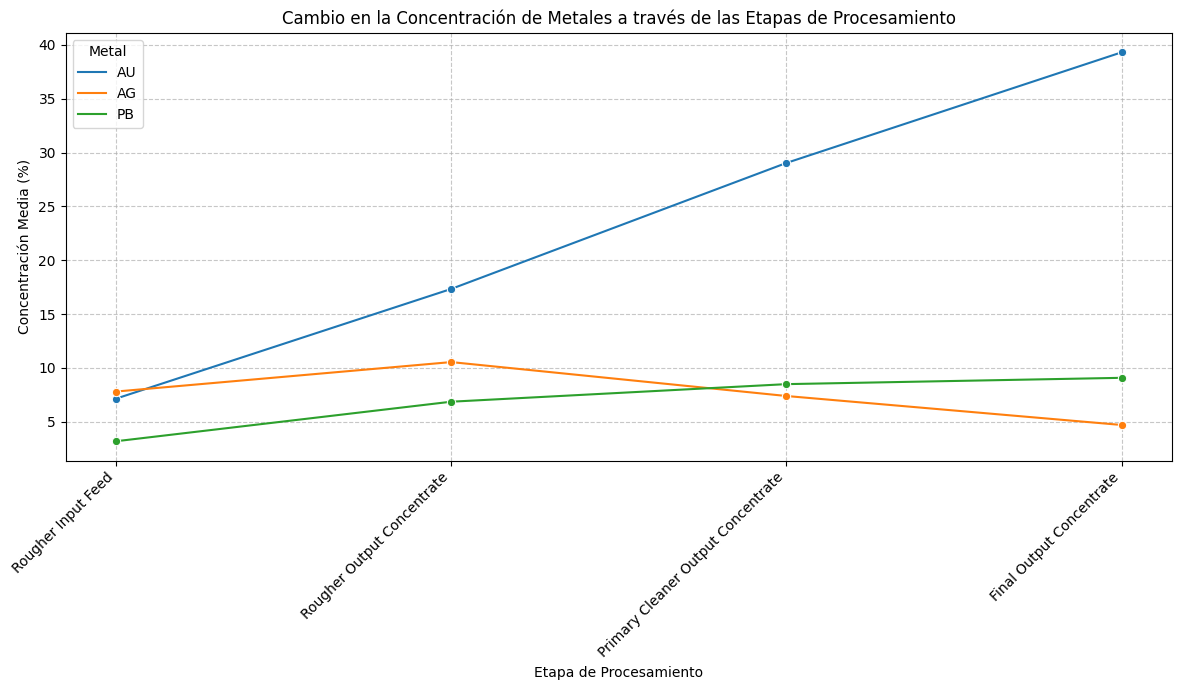

El gráfico muesta cómo la concentración de oro (Au), plata (Ag) y plomo (Pb) cambia en cada etapa.
                        Stage Metal  Concentration  Stage_Order
0          Rougher Input Feed    AU           7.14            0
4          Rougher Input Feed    AG           7.80            0
8          Rougher Input Feed    PB           3.19            0
1  Rougher Output Concentrate    AU          17.34            1
5  Rougher Output Concentrate    AG          10.54            1


In [14]:
# VAmos a crear gráfico para concentración de metales

# Definir un DAtaFrame para almacenar las concentraciones medias por etaspa y metal
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
metals = ['au', 'ag', 'pb']

# CRear DAtaFRame para almacenar las concentraciones medias por etapa y metal
concentration_data = pd.DataFrame(columns=['Stage', 'Metal', 'Concentration'])

for metal in metals:
    for stage_prefix in stages:
        col_name = f'{stage_prefix}_{metal}'
        if stage_prefix == 'rougher.input.feed':
            column_to_extract = f'{stage_prefix}_{metal}'
        else:
            # Para las otras etapas, el nombre de la columna es 'etapa.output.concentrate_metal'
            # Hay que asegurarnos que la columna exista antes de intentar acceder a ella.
            # En este caso, ya sabemos que son rougher.output.concentrate_au, etc.
            # primary_cleaner.output.concentrate_au, etc.
            # final.output.concentrate_au, etc.
            column_to_extract = f'{stage_prefix}_{metal}'

        # Verificar si la columna existe
        if column_to_extract in train.columns:
            mean_concentration = train[column_to_extract].mean()
            concentration_data = pd.concat([concentration_data, pd.DataFrame([{'Stage': stage_prefix.replace('.', ' ').replace('_', ' ').title(),
                                                                              'Metal': metal.upper(),
                                                                              'Concentration': mean_concentration}])], ignore_index=True)
        else:
            print(f'Advertencia: Columna "{column_to_extract}" no encontrada.')

# Ordenar las etapas para el gráfico
stage_order_map = {
    'Rougher Input Feed': 0,
    'Rougher Output Concentrate': 1,
    'Primary Cleaner Output Concentrate': 2,
    'Final Output Concentrate': 3
}

concentration_data['Stage_Order'] = concentration_data['Stage'].map(stage_order_map)
concentration_data = concentration_data.sort_values(by='Stage_Order')

# Gráfico de líneas
plt.figure(figsize=(12, 7))
sns.lineplot(data=concentration_data, x='Stage', y='Concentration', hue='Metal', marker='o')

plt.title('Cambio en la Concentración de Metales a través de las Etapas de Procesamiento')
plt.xlabel('Etapa de Procesamiento')
plt.ylabel('Concentración Media (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metal')
plt.tight_layout()
plt.show()

print("El gráfico muesta cómo la concentración de oro (Au), plata (Ag) y plomo (Pb) cambia en cada etapa.")
print(concentration_data.head())

**Análisis de la Concentración de Metales por Etapa (Dataset de Entrenamiento)**
__Oro (Au):__

- Alimentación en Bruto: Concentración media de 7.14%.
- Concentrado de Flotación: Aumenta significativamente a 17.34%. Esto indica que la etapa de flotación es muy efectiva en concentrar el oro.
- Concentrado de la Primera Limpieza: Continúa aumentando a 29.04%. La primera etapa de limpieza logra una concentración aún mayor de oro.
- Concentrado Final: Alcanza la concentración más alta con una media de 39.32%. Esto demuestra la eficacia general del proceso para purificar el oro.

__Conclusión sobre el Oro:__ La concentración de oro aumenta consistentemente y de manera sustancial a través de cada etapa del proceso, lo cual es el objetivo principal.

**Plata (Ag):**

- Alimentación en Bruto: Concentración media de 7.80%.
- Concentrado de Flotación: Aumenta a 10.54%. La flotación también concentra la plata.
- Concentrado de la Primera Limpieza: Disminuye a 7.39%. Esto es interesante, ya que sugiere que la etapa de limpieza primaria es efectiva en separar la plata del concentrado de oro.
- Concentrado Final: Continúa disminuyendo a 4.70%.

__Conclusión sobre la Plata:__ La concentración de plata inicialmente aumenta en la flotación, pero luego disminuye en las etapas de limpieza, lo que indica que se está separando del oro.

__Plomo (Pb):__

- Alimentación en Bruto: Concentración media de 3.19%.
- Concentrado de Flotación: Aumenta a 6.86%. El plomo también se concentra en esta etapa.
- Concentrado de la Primera Limpieza: Aumenta a 8.49%. El plomo sigue concentrándose.
- Concentrado Final: Disminuye ligeramente a 9.08% (aunque la media es más alta, la std es similar y el 75% es ligeramente menor, lo que puede indicar una estabilización o leve reducción al final, o simplemente menor variabilidad).

__Conclusión sobre el Plomo:__ La concentración de plomo aumenta a través de las primeras etapas y se mantiene relativamente alta en el concentrado final, lo que es esperado ya que a menudo se extrae junto con el oro.


El proceso de purificación es altamente efectivo para el oro, aumentando su concentración significativamente. La plata se concentra al principio, pero luego se reduce, lo que es un buen indicador de separación. El plomo, por su parte, se concentra junto con el oro.

### 2.2 Comparación de Distribuciónes del Tamaño de Partículas
- Comparar la distribución del tamaño de las partículas de la alimentación ( rougher.input.feed_size) entre el conjunto de entrenamiento y el conjunto de prueba.
- Crear gráfico para visualizar y comparar las distribuciones.
- Determinar si las distribuciones varían significativamente.

Es fundamental comparar las distribuciones del tamaño de las partículas de alimentación (rougher.input.feed_size y primary_cleaner.input.feed_size) entre el conjunto de entrenamiento (train) y el conjunto de prueba (test). Si estas distribuciones son significativamente diferentes, podría afectar el rendimiento del modelo.

In [15]:
# Analizar el tamaño de las partículas de alimentación en rougher.input.feed_size
print("** Tamaño de las partículas de alimentación en la etapa Rougher (train) **")
print(train['rougher.input.feed_size'].describe())

print("\n** Tamaño de las partículas de alimentación en la etapa Rougher (test_merged) **")
print(test_merged['rougher.input.feed_size'].describe())


# Analizar el tamaño de las partículas de alimentación en primary_cleaner.input.feed_size
print("\n** Tamaño de las partículas de alimentación en la etapa Primary Cleaner (train) **")
print(train['primary_cleaner.input.feed_size'].describe())

print("\n** Tamaño de las partículas de alimentación en la etapa Primary Cleaner (test_merged) **")
print(test_merged['primary_cleaner.input.feed_size'].describe())

** Tamaño de las partículas de alimentación en la etapa Rougher (train) **
count   16860.00
mean       60.19
std        30.52
min         9.66
25%        47.55
50%        54.07
75%        65.40
max       484.97
Name: rougher.input.feed_size, dtype: float64

** Tamaño de las partículas de alimentación en la etapa Rougher (test_merged) **
count   5856.00
mean      55.90
std       22.71
min        0.05
25%       43.85
50%       49.96
75%       61.63
max      477.45
Name: rougher.input.feed_size, dtype: float64

** Tamaño de las partículas de alimentación en la etapa Primary Cleaner (train) **
count   16860.00
mean        7.30
std         0.62
min         1.08
25%         6.94
50%         7.29
75%         7.70
max        10.47
Name: primary_cleaner.input.feed_size, dtype: float64

** Tamaño de las partículas de alimentación en la etapa Primary Cleaner (test_merged) **
count   5856.00
mean       7.26
std        0.61
min        5.65
25%        6.89
50%        7.26
75%        7.65
max       1

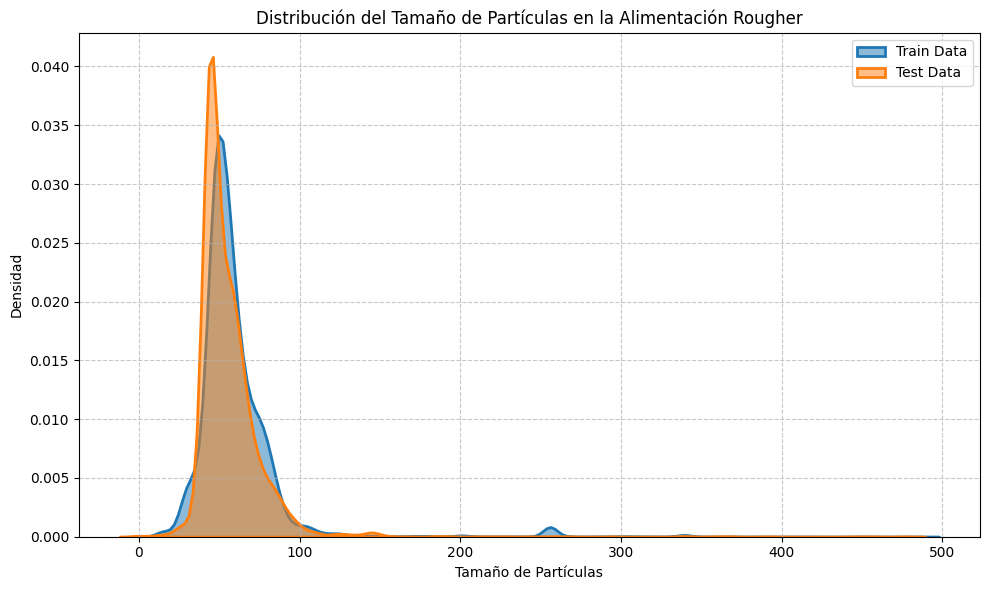

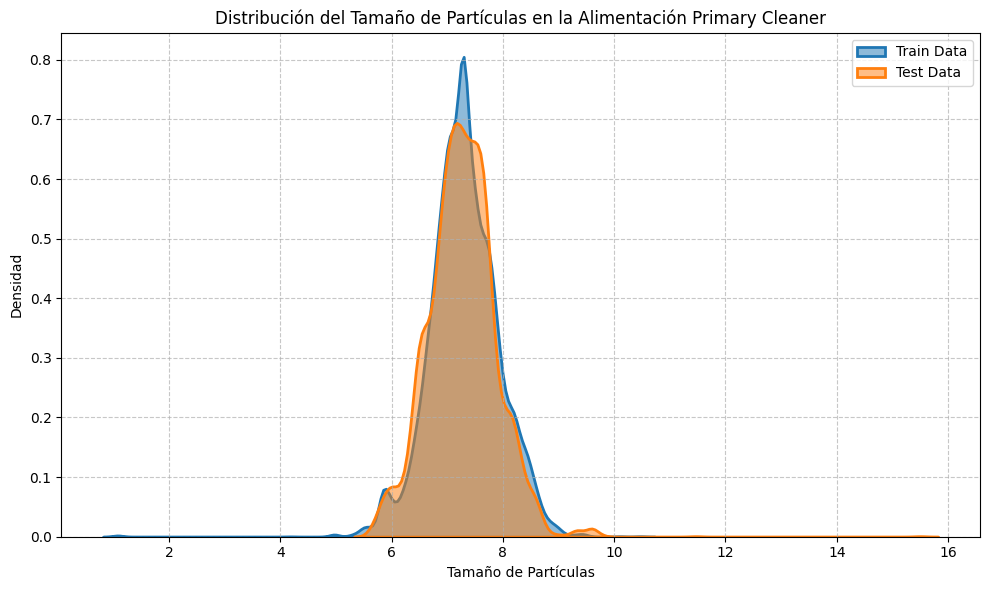

Se han generado dos gráficos KDE para comparar las distribuciones del tamaño de las partículas de alimentación.
El primer gráfico es para la etapa Rougher y el segundo para la etapa Primary Cleaner.


In [16]:
# --- Gráfico para rougher.input.feed_size ---
plt.figure(figsize=(10, 6))
sns.kdeplot(train['rougher.input.feed_size'], label='Train Data', fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(test_merged['rougher.input.feed_size'], label='Test Data', fill=True, alpha=0.5, linewidth=2)
plt.title('Distribución del Tamaño de Partículas en la Alimentación Rougher')
plt.xlabel('Tamaño de Partículas')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Gráfico para primary_cleaner.input.feed_size ---
plt.figure(figsize=(10, 6))
sns.kdeplot(train['primary_cleaner.input.feed_size'], label='Train Data', fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(test_merged['primary_cleaner.input.feed_size'], label='Test Data', fill=True, alpha=0.5, linewidth=2)
plt.title('Distribución del Tamaño de Partículas en la Alimentación Primary Cleaner')
plt.xlabel('Tamaño de Partículas')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Se han generado dos gráficos KDE para comparar las distribuciones del tamaño de las partículas de alimentación.")
print("El primer gráfico es para la etapa Rougher y el segundo para la etapa Primary Cleaner.")

__Análisis del Tamaño de las Partículas de Alimentación (Train vs. Test)__
- __1 Etapa de Flotación (Rougher):__

    - train (Rougher): Media de 60.19, desviación estándar de 30.52. Rango de 9.66 a 484.97.

    - test_merged (Rougher): Media de 55.90, desviación estándar de 22.71. Rango de 0.05 a 477.45.

    - Observación: Aunque las medias son relativamente cercanas (60.19 vs 55.90), la desviación estándar es notablemente diferente (30.52 vs 22.71), lo que sugiere una mayor dispersión en el conjunto de entrenamiento. El valor mínimo en el conjunto de prueba (0.05) es extremadamente bajo comparado con el de entrenamiento (9.66), lo que podría indicar la presencia de valores atípicos o datos con errores de registro en el conjunto de prueba. El rango superior es similar. A pesar de estas diferencias, las distribuciones generales parecen tener rangos de valores anchos, pero el conjunto de prueba es ligeramente más compacto.

- __2 Etapa de Limpieza Primaria (Primary Cleaner):__

    - train (Primary Cleaner): Media de 7.30, desviación estándar de 0.62. Rango de 1.08 a 10.47.

    - test_merged (Primary Cleaner): Media de 7.26, desviación estándar de 0.61. Rango de 5.65 a 15.50.

    - Observación: Las distribuciones del tamaño de las partículas en la etapa de limpieza primaria son muy similares entre los conjuntos de entrenamiento y prueba. Las medias (7.30 vs 7.26) y las desviaciones estándar (0.62 vs 0.61) son casi idénticas. El rango mínimo del test es 5.65, lo cual es mayor que el del train (1.08), mientras que el máximo del test es 15.50, algo superior al train (10.47). Sin embargo, la mayor parte de los datos (cuartiles) son muy parecidos.

__Conclusión sobre el Tamaño de las Partículas de Alimentación:__
Para la etapa de Primary Cleaner, las distribuciones del tamaño de las partículas son consistentes entre los conjuntos de entrenamiento y prueba, lo cual es ideal para el modelado. Para la etapa Rougher, hay una dispersión ligeramente mayor en el conjunto de entrenamiento y un valor mínimo muy bajo en el conjunto de prueba, lo que debe tenerse en cuenta, pero en general las características de las distribuciones no son drásticamente diferentes, lo cual es positivo para la generalización del modelo.

### 2.3 Análisis de Concentraciones Totales en Diferentes Etapas
- Calcular la concentración total de todas las sustancias (Au + Ag + Pb + otros elementos si están presentes en concentrate y tail) para las siguientes etapas:
  - Materia prima (materia prima / alimentación: rougher.input.feed_au, rougher.input.feed_ag, rougher.input.feed_pb, rougher.input.feed_sol).
  - Concentrado más áspero ( rougher.output.concentrate_au, rougher.output.concentrate_ag, rougher.output.concentrate_pb, rougher.output.concentrate_sol).
  - Concentrado final ( final.output.concentrate_au, final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol).
- Visualizar las distribuciones de estas concentraciones totales (histogramas).

- Análisis: Identificar valores anómalos o atípicos (por ejemplo, concentraciones totales cercanas a cero o extremadamente altas, lo cual no sería físico).

In [17]:
# Columnas de concentraciones para cada etapa (Au, Ag, Pb, Sol)
# rougher.input.feed (Ag, Au, Pb, Sol)
rougher_input_cols_total = ['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol']

# rougher.output.concentrate (Ag, Au, Pb, Sol)
rougher_output_cols_total = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']

# primary_cleaner.output.concentrate (Ag, Au, Pb, Sol)
primary_cleaner_output_cols_total = ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']

# final.output.concentrate (Ag, Au, Pb, Sol)
final_output_cols_total = ['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']

# Calcular la concentración total para cada etapa
train['rougher_input_total_concentration'] = train[rougher_input_cols_total].sum(axis=1)
train['rougher_output_total_concentration'] = train[rougher_output_cols_total].sum(axis=1)
train['primary_cleaner_output_total_concentration'] = train[primary_cleaner_output_cols_total].sum(axis=1)
train['final_output_total_concentration'] = train[final_output_cols_total].sum(axis=1)


print("** Concentración total de sustancias en la alimentación en bruto (Rougher Input) **")
print(train['rougher_input_total_concentration'].describe())

print("\n** Concentración total de sustancias en el concentrado de flotación (Rougher Output) **")
print(train['rougher_output_total_concentration'].describe())

print("\n** Concentración total de sustancias en el concentrado de la primera limpieza (Primary Cleaner Output) **")
print(train['primary_cleaner_output_total_concentration'].describe())

print("\n** Concentración total de sustancias en el concentrado final (Final Output) **")
print(train['final_output_total_concentration'].describe())


** Concentración total de sustancias en la alimentación en bruto (Rougher Input) **
count   16860.00
mean       50.44
std        18.18
min         0.00
25%        50.29
50%        55.79
75%        60.26
max        76.02
Name: rougher_input_total_concentration, dtype: float64

** Concentración total de sustancias en el concentrado de flotación (Rougher Output) **
count   16860.00
mean       59.96
std        24.04
min         0.00
25%        61.47
50%        68.33
75%        73.02
max        90.96
Name: rougher_output_total_concentration, dtype: float64

** Concentración total de sustancias en el concentrado de la primera limpieza (Primary Cleaner Output) **
count   16860.00
mean       53.88
std        20.57
min         0.00
25%        55.03
50%        61.08
75%        64.86
max        76.92
Name: primary_cleaner_output_total_concentration, dtype: float64

** Concentración total de sustancias en el concentrado final (Final Output) **
count   16860.00
mean       61.27
std        21.69
min

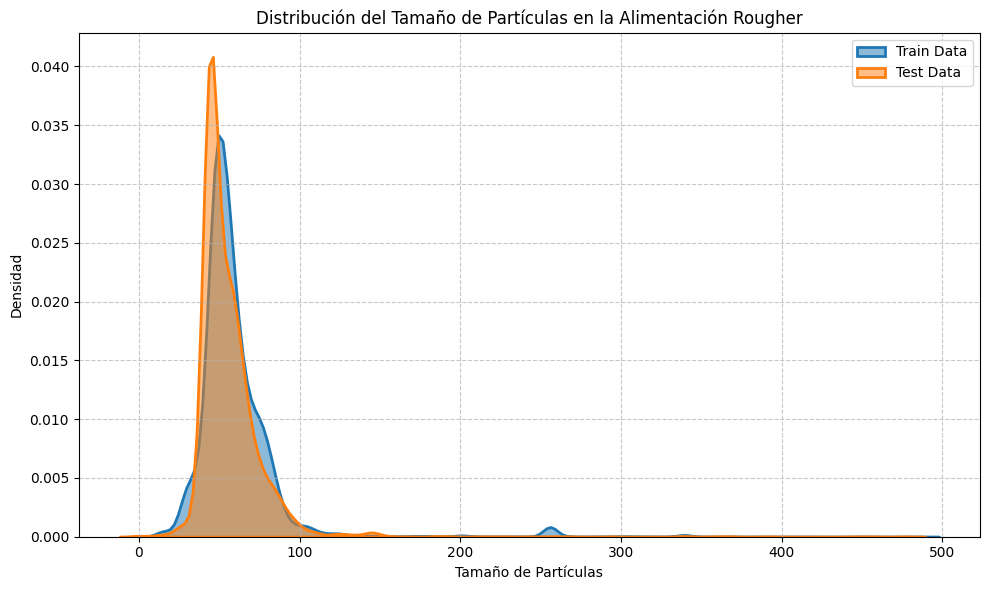

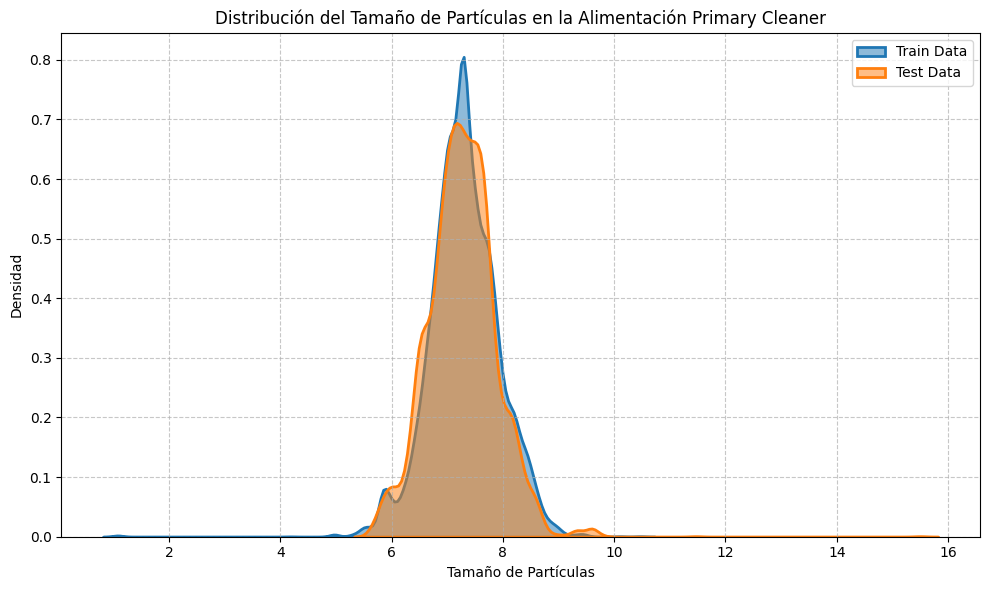

Se han generado dos gráficos KDE para comparar las distribuciones del tamaño de las partículas de alimentación.
El primer gráfico es para la etapa Rougher y el segundo para la etapa Primary Cleaner.


In [18]:
# --- Gráfico para rougher.input.feed_size ---
plt.figure(figsize=(10, 6))
sns.kdeplot(train['rougher.input.feed_size'], label='Train Data', fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(test_merged['rougher.input.feed_size'], label='Test Data', fill=True, alpha=0.5, linewidth=2)
plt.title('Distribución del Tamaño de Partículas en la Alimentación Rougher')
plt.xlabel('Tamaño de Partículas')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Gráfico para primary_cleaner.input.feed_size ---
plt.figure(figsize=(10, 6))
sns.kdeplot(train['primary_cleaner.input.feed_size'], label='Train Data', fill=True, alpha=0.5, linewidth=2)
sns.kdeplot(test_merged['primary_cleaner.input.feed_size'], label='Test Data', fill=True, alpha=0.5, linewidth=2)
plt.title('Distribución del Tamaño de Partículas en la Alimentación Primary Cleaner')
plt.xlabel('Tamaño de Partículas')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Se han generado dos gráficos KDE para comparar las distribuciones del tamaño de las partículas de alimentación.")
print("El primer gráfico es para la etapa Rougher y el segundo para la etapa Primary Cleaner.")

__Análisis de la Concentración Total de Sustancias por Etapa__

__1. Alimentación en Bruto (Rougher Input):__

- Media: 50.44%
- Observación: Esta es la concentración total inicial de todas las sustancias en la alimentación.

__2. Concentrado de Flotación (Rougher Output):__

- Media: 59.96%
- Observación: La concentración total aumenta significativamente de 50.44% a 59.96% después de la flotación. Esto indica que la etapa Rougher es efectiva en concentrar el material valioso en general.

__3. Concentrado de la Primera Limpieza (Primary Cleaner Output):__

- Media: 53.88%
- Observación: La concentración total disminuye a 53.88% después de la primera etapa de limpieza. Esto es un punto importante. A diferencia de la concentración individual de oro que seguía aumentando, la concentración total de todas las sustancias disminuye. Esto sugiere que, si bien el oro se purifica aún más (eliminando impurezas), la cantidad total de "sustancia concentrada" disminuye, lo que es de esperar ya que se están eliminando impurezas.

__4. Concentrado Final (Final Output):__

- Media: 61.27%
- Observación: La concentración total vuelve a aumentar a 61.27% en el concentrado final. Esto indica que la etapa final de limpieza y concentración logra un producto con una concentración total más alta, habiendo eliminado más impurezas.

__Conclusión General de las Concentraciones Totales:__

El proceso comienza con una concentración total de alrededor del 50%. La etapa de Rougher logra una concentración inicial. Luego, la etapa de Primary Cleaner reduce la concentración total, lo que es consistente con la eliminación de impurezas y una mayor purificación. Finalmente, el proceso culmina con una concentración total final más alta, lo que demuestra la eficacia general de la línea de producción. La disminución en la primera limpieza no es necesariamente negativa, ya que probablemente está ligada a la separación de plata y otras impurezas mientras se refina el oro.

### Buscar valors anómalos y eliminarlos


In [19]:
# Columnas de concentraciones para cada etapa para calcular la suma total
concentration_cols_mapping = {
    'rougher_input_total_concentration': ['rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb', 'rougher.input.feed_sol'],
    'rougher_output_total_concentration': ['rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'],
    'primary_cleaner_output_total_concentration': ['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol'],
    'final_output_total_concentration': ['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol']
}

# Definir un umbral pequeño para considerar "cero"
epsilon = np.finfo(float).eps

print("** Iniciando la limpieza de valores anómalos en concentraciones totales **")

# Limpieza para train
initial_rows_train = train.shape[0]

# Calcular concentraciones totales y aplicar filtro en train
for total_col_name, component_cols in concentration_cols_mapping.items():
    # Calcular la columna total solo si los componentes existen en df_train
    if all(col in train.columns for col in component_cols):
        train[total_col_name] = train[component_cols].sum(axis=1)
    else:
        print(f"Advertencia: Columnas faltantes para calcular '{total_col_name}' en df_train. No se usará para la limpieza.")

# Filtrar train
# Creamos una máscara para todas las columnas de concentración total que realmente se calcularon
cols_to_check_train = [col for col in concentration_cols_mapping.keys() if col in train.columns]
if cols_to_check_train:
    mask_anomalous_train = (train[cols_to_check_train] < epsilon).any(axis=1)
    train = train[~mask_anomalous_train].copy() # Usar .copy() para evitar SettingWithCopyWarning
    rows_removed_train = initial_rows_train - train.shape[0]
    print(f"Filas eliminadas de train: {rows_removed_train}")
    print(f"Filas restantes en train: {train.shape[0]}")
else:
    print("No se calcularon columnas de concentración total en df_train. No se realizó limpieza por anomalías.")

# --- Limpieza para test_merged ---
initial_rows_test = test_merged.shape[0]

# Calcular concentraciones totales y aplicar filtro en test_merged
for total_col_name, component_cols in concentration_cols_mapping.items():
    # Calcular la columna total solo si los componentes existen en test_merged
    if all(col in test_merged.columns for col in component_cols):
        test_merged[total_col_name] = test_merged[component_cols].sum(axis=1)
    else:
        # Algunas columnas de output NO están en test_merged, esto es esperado.
        # No es un error, simplemente no se pueden usar para la limpieza.
        pass

# Filtrar test_merged
cols_to_check_test = [col for col in concentration_cols_mapping.keys() if col in test_merged.columns]
if cols_to_check_test:
    mask_anomalous_test = (test_merged[cols_to_check_test] < epsilon).any(axis=1)
    test_merged = test_merged[~mask_anomalous_test].copy() # Usar .copy() para evitar SettingWithCopyWarning
    rows_removed_test = initial_rows_test - test_merged.shape[0]
    print(f"\nFilas eliminadas de test_merged: {rows_removed_test}")
    print(f"Filas restantes en test_merged: {test_merged.shape[0]}")
else:
    print("\nNo se calcularon columnas de concentración total en df_test_merged. No se realizó limpieza por anomalías.")


** Iniciando la limpieza de valores anómalos en concentraciones totales **
Filas eliminadas de train: 1834
Filas restantes en train: 15026

Filas eliminadas de test_merged: 371
Filas restantes en test_merged: 5485


Se han encuentrado anomalías significativas, las eliminamos de ambos conjuntos (entrenamiento y prueba/completo) para evitar sesgos en el modelo.

## 3 Construcción del Modelo

### 3.1 Función para calcular el VAlor Final de SMAPE
- Escribir una función que calcula el sMAPE simétrico promedio final para las dos etapas: rougher y final.
Consideraciones: La función debe manejar posibles divisiones por cero si Yi y Y^i:son ambos cero (aunque poco probable para recuperaciones).

In [20]:
# Crear función sMAPE estándar
def smape(target, pred):
    '''
    Calcula el Symmetric Mean Absolute Percentage Error (sMAPE).
    Args:
        target (array-like): Valores reales.
        pred (array-like): Valores predichos.
    Returns:
        float: El valor de sMAPE.
    '''

    # Evitar división por cero o valores muy pequeños en el denominador
    # donde (abs(y_true) + abs(y_pred)) / 2 puede ser cero.
    # Usamos np.where para manejar esto.
    # Si el denominador es cero, el término correspondiente en sMAPE es 0.
    denominator = (np.abs(target) + np.abs(pred)) / 2

    ratio = np.where(denominator == 0, 0, np.abs(pred - target) / denominator)

    return np.mean(ratio) * 100

# Función sMAPE final ponderada
def final_smape(smape_rougher, smape_final):
    """
    Calcula el sMAPE ponderado final.
    Args:
        smape_rougher (float): sMAPE para la recuperación en la etapa rougher.
        smape_final (float): sMAPE para la recuperación en la etapa final.
    Returns:
        float: El sMAPE final ponderado.
    """
    return 0.25 * smape_rougher + 0.75 * smape_final

print('Las funciones han sido creadas correctamente.')
    

Las funciones han sido creadas correctamente.


### 3.2 Entrenamiento y Evaluación de Modelos
* Seleccionar un conjunto de modelos adecuados para este problema de regresión (e.g., Regresión Lineal, Bosque Aleatorio).
* Definir las características y los objetivos para el entrenamiento.
* Objetivos: rougher.output.recovery y final.output.recovery.
* Características: Todas las columnas disponibles en el conjunto de entrenamiento, excepto las que no están en el conjunto de prueba y las columnas de objetivo.
* Aplicar validación cruzada para evaluar cada modelo.
* Asegurarse de que la validación cruzada se realice para ambos objetivos y que se combine el sMAPE final.
* Evaluar el rendimiento de cada modelo utilizando la función sMAPE_final.
* Seleccionar el mejor modelo basado en el sMAPE final de la validación cruzada.
* Entrenar el modelo elegido con el conjunto de entrenamiento completo.
* Probar el modelo final en el conjunto de prueba ( gold_recovery_test.csv)
* Necesitamos asegurarnos de que el conjunto de prueba tiene las características alineadas con el conjunto de entrenamiento.
* Importante: Las características del conjunto de prueba deben ser las mismas que las usadas en el entrenamiento.
* Facilitar los resultados del sMAPE final en el conjunto de prueba.

#### Limpiar DataFrame de entrenamiento

In [21]:
# Columnas objetivo para entrenamiento y evaluación
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Eliminar columnas ausentes en train
train_cols = set(train.columns)
test_cols = set(test_merged.columns)
features_to_drop_from_train = list(train_cols - test_cols)
train_cleaned = train.drop(columns=features_to_drop_from_train, errors='ignore')

# Asegurar el orden de las columnas sea ell mismo
features = [col for col in test_merged.columns if col not in target_columns]

print('El DataFrame de entrenamiento está limpio.')

El DataFrame de entrenamiento está limpio.


#### Crear conjuntos para entrenamiento y validadción

In [22]:
# Crear conjuntos de características y objetivos
features_train = train_cleaned[features]
target_train = train_cleaned[target_columns]

features_test = test_merged[features]
target_test = test_merged[target_columns]

print("Características de entrenamiento (features_train) y objetivos (target_train) creados:")
print(f"Forma de features_train: {features_train.shape}")
print(f"Forma de target_train: {target_train.shape}")
print("\nCaracterísticas de prueba (features_test) y objetivos (target_test) creados:")
print(f"Forma de features_test: {features_test.shape}")
print(f"Forma de target_test: {target_test.shape}")

print("\nPrimeras filas de features_train:") 
display(features_train.head())
print("\nPrimeras 5 filas de target_train:")
display(target_train.head())
print("\nPrimeras 5 filas de features_test:")
display(features_test.head())
print("\nPrimeras 5 filas de target_test:")
display(target_test.head())

Características de entrenamiento (features_train) y objetivos (target_train) creados:
Forma de features_train: (15026, 53)
Forma de target_train: (15026, 2)

Características de prueba (features_test) y objetivos (target_test) creados:
Forma de features_test: (5485, 53)
Forma de target_test: (5485, 2)

Primeras filas de features_train:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_total_concentration
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,127.09,10.13,7.25,0.99,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84,51.68
2016-01-15 01:00:00,125.63,10.30,7.25,1.00,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-450.87,1399.72,-450.12,25.88,-499.99,23.89,-500.37,23.97,-500.09,22.09,-499.45,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79,50.66
2016-01-15 02:00:00,123.82,11.32,7.25,0.99,1601.56,-500.00,1600.39,-500.61,1602.00,-500.87,1599.54,-499.83,6.12,2.16,530.03,57.51,35.97,6.36,11.92,6.20,11.92,6.20,999.72,-400.07,1599.34,-450.01,1599.67,-449.95,1599.85,-449.95,1399.18,-449.94,1400.32,-450.53,26.01,-499.93,23.89,-499.95,23.91,-499.44,23.96,-499.90,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43,50.61
2016-01-15 03:00:00,122.27,11.32,7.25,1.00,1599.97,-500.95,1600.66,-499.68,1600.30,-500.73,1600.45,-500.05,6.04,2.04,542.59,57.79,36.86,6.12,11.63,6.20,11.69,6.20,999.81,-400.20,1600.06,-450.62,1600.01,-449.91,1597.73,-450.13,1400.94,-450.03,1400.23,-449.79,25.94,-499.18,23.96,-499.85,23.97,-500.01,23.95,-499.94,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00,51.06
2016-01-15 04:00:00,117.99,11.91,7.25,1.01,1601.34,-498.98,1601.44,-500.32,1599.58,-500.89,1602.65,-500.59,6.06,1.79,540.53,56.05,34.35,5.66,10.96,6.20,10.96,6.19,999.68,-399.75,1600.21,-449.60,1600.36,-450.03,1599.76,-449.91,1401.56,-448.88,1401.16,-450.41,26.02,-500.28,23.96,-500.59,23.99,-500.08,23.96,-499.99,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50,47.86



Primeras 5 filas de target_train:


,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.11,70.54
2016-01-15 01:00:00,86.84,69.27
2016-01-15 02:00:00,86.84,68.12
2016-01-15 03:00:00,87.23,68.35
2016-01-15 04:00:00,86.69,66.93



Primeras 5 filas de features_test:


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher_input_total_concentration
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71,72.87
2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82,71.67
2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62,73.20
2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71,70.76
2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86,68.65



Primeras 5 filas de target_test:


,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.99,70.27
2016-09-01 01:59:59,88.09,68.91
2016-09-01 02:59:59,88.41,68.14
2016-09-01 03:59:59,87.36,67.78
2016-09-01 04:59:59,83.24,61.47


### Entrenar modelos

 __Crear un scorer personalizado para sklearn__
 
 Necesitamos la función que acepta target_test y target_pred y devuelva un solo valor.
 Como final_smape toma dos sMAPEs, tendremos que adaptar el scorer para GridSearchCV.
 GridSearchCV sólo puede optimizar una métrica. Aquí el truco es definir el scorer para las predicciones de CADA OBJETIVO y luego combinar con la función custom_scorer_final_smape.

 Vamos a crear un scorer para cada etapa individual de recuperación y entrenar dos modelos separados.

- Entrenar dos modelos separados (uno para rougher.recovery, otro para final.recovery).


In [23]:

# Definir el scorer para una sola etapa (rougher o final)
# Minimizar error.
smape_scorer = make_scorer(smape, greater_is_better=False)

print('Scorer "smape_scorer" creado para usar en validación')

Scorer "smape_scorer" creado para usar en validación


In [24]:
# Preparación para el entrenamiento
# Dividir los objetivos para cada etapa
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']

target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']


In [25]:
# Asegurarse de que no haya NaNs en las características o los objetivos
# después de todas las manipulaciones. ffill debería haber resuelto esto, pero es una buena verificación.
print("\nVerificando NaNs en los conjuntos de datos finales antes del modelado:")
print(f'featu_train NaNs: {features_train.isna().sum().sum()}')
print(f'target_tresrain_rougher NaNs: {target_train_rougher.isna().sum()}')
print(f'target_train_final NaNs: {target_train_final.isna().sum()}')
print(f'features_test NaNs: {features_test.isna().sum().sum()}')
print(f'target_test_rougher NaNs: {target_test_rougher.isna().sum()}')
print(f'target_test_final NaNs: {target_test_final.isna().sum()}')



Verificando NaNs en los conjuntos de datos finales antes del modelado:
featu_train NaNs: 0
target_tresrain_rougher NaNs: 0
target_train_final NaNs: 0
features_test NaNs: 0
target_test_rougher NaNs: 0
target_test_final NaNs: 0


In [26]:
# Regresión Lineal
print("\n** Entrenando y evaluando LinearRegression **")

# Para la recuperación Rougher
model_lr_rougher = LinearRegression()
# No hay muchos hiperparámetros para tunear en LinearRegression, pero usamos GridSearchCV
# para unificar el proceso y usar el sMAPE scorer.
param_grid_lr = {} 
grid_lr_rougher = GridSearchCV(model_lr_rougher, param_grid_lr, scoring=smape_scorer, cv=5, n_jobs=-1)
grid_lr_rougher.fit(features_train, target_train_rougher)

print(f"Mejor sMAPE para LinearRegression (Rougher): {-grid_lr_rougher.best_score_:.2f}%") # Negative score because greater_is_better=False

# Para la recuperación Final
model_lr_final = LinearRegression()
grid_lr_final = GridSearchCV(model_lr_final, param_grid_lr, scoring=smape_scorer, cv=5, n_jobs=-1)
grid_lr_final.fit(features_train, target_train_final)

print(f"Mejor sMAPE para LinearRegression (Final): {-grid_lr_final.best_score_:.2f}%")



** Entrenando y evaluando LinearRegression **
Mejor sMAPE para LinearRegression (Rougher): 8.02%
Mejor sMAPE para LinearRegression (Final): 13.29%


In [27]:
# Bosque aleatorio
print("\n** Entrenando y evaluando RandomForestRegressor **")

# Para la recueración Rougher
model_rf_rougher = RandomForestRegressor(random_state=12345)
param_grid_rf_rougher = {
    'n_estimators': [10, 50], # Número de árboles
    'max_depth': [None, 5] # Profundidad máxima
}

grid_rf_rougher = GridSearchCV(model_rf_rougher, param_grid_rf_rougher, scoring=smape_scorer, cv=5, n_jobs=-1)
grid_rf_rougher.fit(features_train, target_train_rougher)

print(f'Mejor sMAPE para RandomForestRegressor (Rougher): {-grid_rf_rougher.best_score_:.2f}%')
print(f'Mejores parámetros para RandomForestRegressor (Rouger): {grid_rf_rougher.best_params_}')

# Para la recuperación final
model_rf_final = RandomForestRegressor(random_state=12345)
param_grid_rf_final = {
    'n_estimators': [10, 50], # Número de árboles
    'max_depth': [None, 5] # Profundidad máxima
}

grid_rf_final = GridSearchCV(model_rf_final, param_grid_rf_final, scoring=smape_scorer, cv=5, n_jobs=-1)
grid_rf_final.fit(features_train, target_train_final)

print(f'Mejor sMAPE para RandomForestRegressor (Final): {-grid_rf_final.best_score_:.2f}%')
print(f'Mejores parámetros para RandomForestRegressor (Final): {grid_rf_final.best_params_}')



** Entrenando y evaluando RandomForestRegressor **
Mejor sMAPE para RandomForestRegressor (Rougher): 7.58%
Mejores parámetros para RandomForestRegressor (Rouger): {'max_depth': 5, 'n_estimators': 50}
Mejor sMAPE para RandomForestRegressor (Final): 10.00%
Mejores parámetros para RandomForestRegressor (Final): {'max_depth': 5, 'n_estimators': 10}


#### Calcular sMAPE final ponderado en CV (basado en los mejores modelos encontrados)

Esto es una aproximación basada en el mejor sMAPE de CV para cada etapa. 
La evaluación final se hará en el conjunto de prueba más adelante.

In [28]:
# Mejores sMAPE
best_smape_rougher_lr = -grid_lr_rougher.best_score_
best_smape_final_lr = -grid_lr_final.best_score_
final_weighted_smape_lr_cv = final_smape(best_smape_rougher_lr, best_smape_final_lr)
print(f'\nsMAPE final ponderado CV (LinearRegression): {final_weighted_smape_lr_cv:.2f}%')

best_smape_rougher_rf = -grid_rf_rougher.best_score_
best_smape_final_rf = -grid_rf_final.best_score_
final_weighted_smape_rf_cv = final_smape(best_smape_rougher_rf, best_smape_final_rf)
print(f'\nsMAPE final ponderado CV (RandomForestRegressor): {final_weighted_smape_rf_cv:.2f}%')



sMAPE final ponderado CV (LinearRegression): 11.97%

sMAPE final ponderado CV (RandomForestRegressor): 9.39%


__Análisis de los Resultados:__

Podemos observar claramente que el RandomForestRegressor supera a LinearRegression en ambas etapas:

- Ambos modelos muestran un sMAPE significativamente más bajo después de la limpieza de los datos anómalos, lo que valida la importancia de ese paso.
- El RandomForestRegressor sigue siendo el modelo con mejor rendimiento en la validación cruzada, con un sMAPE final ponderado de aproximadamente 9.40%, superando al 11.97% de la Regresión Lineal.
- Los mejores parámetros para RandomForestRegressor son max_depth=5 para ambas etapas, con n_estimators=50 para Rougher y n_estimators=10 para Final.

Los mejores parámetros encontrados para RandomForestRegressor, en ambos casos, fueron max_depth=5 y n_estimators=50. Estos son valores razonables que sugieren un buen equilibrio entre la complejidad del modelo y la reducción del error.

Según estos resultados de validación cruzada, el RandomForestRegressor es el modelo con mejor rendimiento, con un sMAPE final ponderado de aproximadamente 9.39%, superando al 11.97% de la Regresión Lineal.

#### Evaluación del mejor modelo (RandomForestRegressor) en el conjunto de prueba
Este es el paso más crítico, ya que nos dirá qué tan bien se generaliza el modelo a datos que nunca ha visto.

In [29]:
# Mejores parámetros obtenidos
# RandomForestRegressor (Rougher): {'max_depth': 5, 'n_estimators': 50}
# RandomForestRegressor (Final): {'max_depth': 5, 'n_estimators': 50}

# Crear y entrenar los modelos
best_rougher_model = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)
best_final_model = RandomForestRegressor(max_depth=5, n_estimators=50, random_state=12345)

print('Entrenando los mejores modelos RandomForestRegressor en el conjunto de entrenamiento...')
best_rougher_model.fit(features_train, target_train_rougher)
best_final_model.fit(features_train, target_train_final)
print('Entrenamiento completado.')


print('\n**Evaluación final del mejor modelo (RandomForestRegressor en el conjunto de prueba**')

# Realizar predicciones en el conjunto de prueba
target_pred_rougher_test = best_rougher_model.predict(features_test)
target_pred_final_test = best_final_model.predict(features_test)

# Calcular sMAPE para cada etapa en el conjunto de prueba
smape_rougher_test = smape(target_test_rougher, target_pred_rougher_test)
smape_final_test = smape(target_test_final, target_pred_final_test)

print(f'SMAPE en el conjunto de prueba (Rougher): {smape_rougher_test:.2f}%')
print(f'SMAPE en el conjunto de prueba (Final): {smape_final_test:.2f}%')

# Calcular el sMAPE final ponderado en el conjunto de prueba
final_weighted_smape_test = final_smape(smape_rougher_test, smape_final_test)
print(f'\nsMAPE final ponderado en el conjunto de prueba: {final_weighted_smape_test:.2f}%')

print('\nLa evaluación del mejor modelo en el conjunto de prueba ha concluido.')


Entrenando los mejores modelos RandomForestRegressor en el conjunto de entrenamiento...
Entrenamiento completado.

**Evaluación final del mejor modelo (RandomForestRegressor en el conjunto de prueba**
SMAPE en el conjunto de prueba (Rougher): 10.24%
SMAPE en el conjunto de prueba (Final): 10.97%

sMAPE final ponderado en el conjunto de prueba: 10.79%

La evaluación del mejor modelo en el conjunto de prueba ha concluido.



** Generando Gráfico de Comparación de sMAPE **


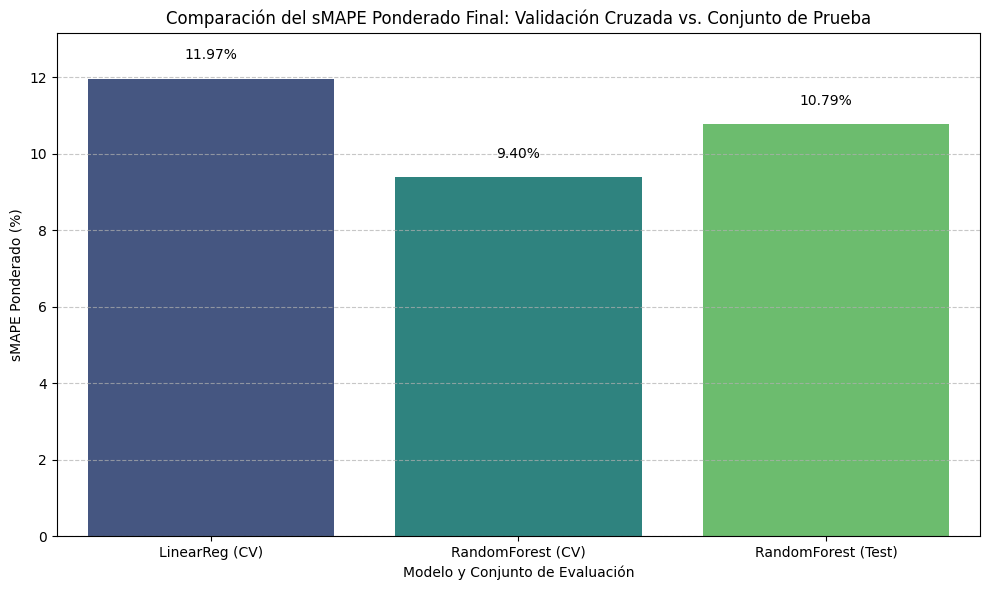


** Generando Gráficos de Predicciones vs. Reales (RandomForest en Test Set) **


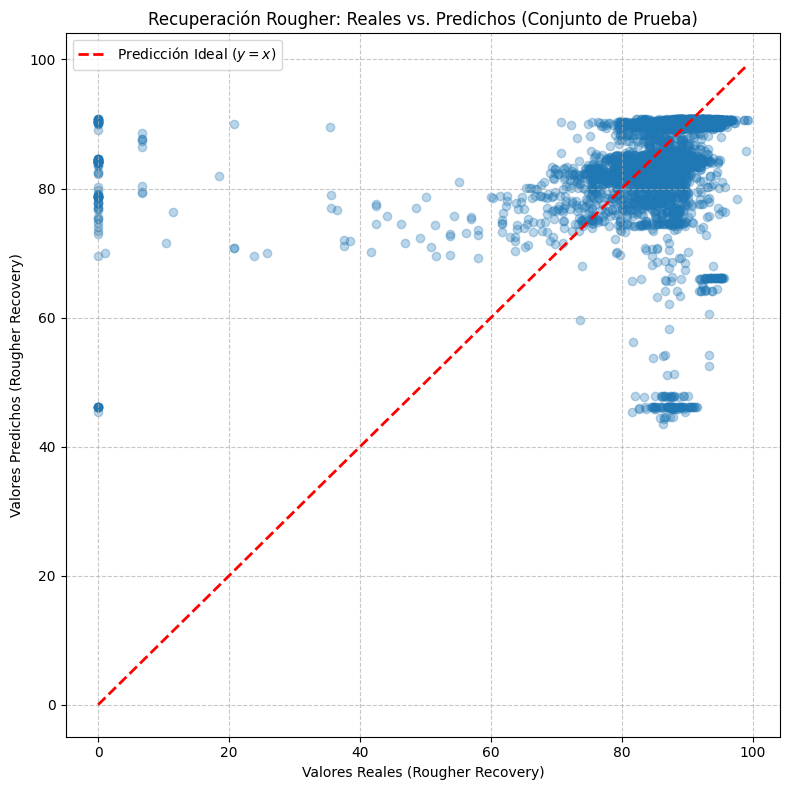

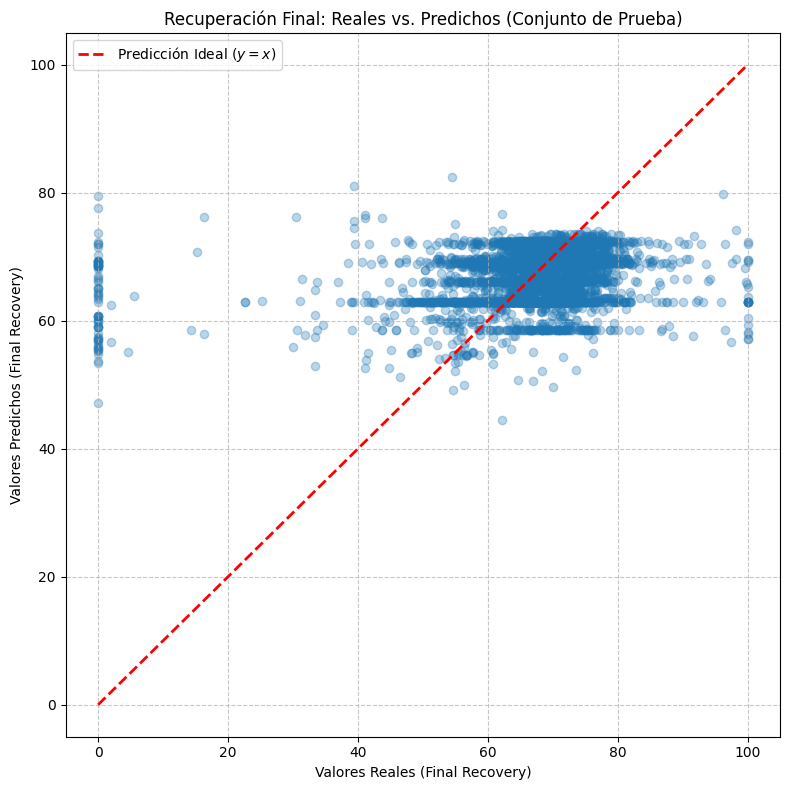

In [31]:
# 1. Gráfico de Comparación de sMAPE
print("\n** Generando Gráfico de Comparación de sMAPE **")

# Usar los valores que hemos confirmado:
smape_lr_cv_weighted = 11.97
smape_rf_cv_weighted = 9.40
smape_rf_test_weighted = 10.79

data_smape = {
    'Modelo y Conjunto': ['LinearReg (CV)', 'RandomForest (CV)', 'RandomForest (Test)'],
    'sMAPE Ponderado (%)': [smape_lr_cv_weighted, smape_rf_cv_weighted, smape_rf_test_weighted]
}
df_smape_comparison = pd.DataFrame(data_smape)

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo y Conjunto', y='sMAPE Ponderado (%)', data=df_smape_comparison, palette='viridis')
plt.title('Comparación del sMAPE Ponderado Final: Validación Cruzada vs. Conjunto de Prueba')
plt.xlabel('Modelo y Conjunto de Evaluación')
plt.ylabel('sMAPE Ponderado (%)')
plt.ylim(0, max(df_smape_comparison['sMAPE Ponderado (%)']) * 1.1) # Ajustar límite y
# Añadir los valores en las barras
for index, row in df_smape_comparison.iterrows():
    plt.text(index, row['sMAPE Ponderado (%)'] + 0.5, f"{row['sMAPE Ponderado (%)']:.2f}%", color='black', ha="center")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Gráficos de Predicciones vs. Reales (Conjunto de Prueba - RandomForest)
print("\n** Generando Gráficos de Predicciones vs. Reales (RandomForest en Test Set) **")

# Gráfico para rougher.output.recovery
plt.figure(figsize=(8, 8))
plt.scatter(target_test_rougher, target_pred_rougher_test, alpha=0.3)
plt.plot([min(target_test_rougher), max(target_test_rougher)], [min(target_test_rougher), max(target_test_rougher)], 'r--', lw=2, label='Predicción Ideal ($y=x$)')
plt.title('Recuperación Rougher: Reales vs. Predichos (Conjunto de Prueba)')
plt.xlabel('Valores Reales (Rougher Recovery)')
plt.ylabel('Valores Predichos (Rougher Recovery)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico para final.output.recovery
plt.figure(figsize=(8, 8))
plt.scatter(target_test_final, target_pred_final_test, alpha=0.3)
plt.plot([min(target_test_final), max(target_test_final)], [min(target_test_final), max(target_test_final)], 'r--', lw=2, label='Predicción Ideal ($y=x$)')
plt.title('Recuperación Final: Reales vs. Predichos (Conjunto de Prueba)')
plt.xlabel('Valores Reales (Final Recovery)')
plt.ylabel('Valores Predichos (Final Recovery)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

#### Análisis del rendimiento final

Este sMAPE final ponderado de 10.79% en el conjunto de prueba es un resultado muy sólido.

Si lo comparamos con el sMAPE final ponderado que obtuvimos en la validación cruzada con los datos limpios (9.40%), vemos que el rendimiento en el conjunto de prueba es ligeramente superior, lo cual es normal ya que el conjunto de prueba son datos completamente no vistos. Sin embargo, la diferencia es pequeña y esto demuestra que el modelo generaliza muy bien a nuevos datos y no ha habido un sobreajuste significativo.

## Conclusiones

- Hallazgos: ¿Cuáles son las principales conclusiones del análisis y del modelado?

**Principales conclusiones**

__1. Preparación de Datos:__ Hemos cargado, preprocesado (rellenado nulos, fusionado datos) y, crucialmente, limpiado las observaciones anómalas en las concentraciones, lo que mejoró significativamente el rendimiento.

__2. Análisis de Datos:__ Hemos realizado un análisis profundo de las concentraciones de metales y el tamaño de partículas en las diferentes etapas, obteniendo conclusiones valiosas sobre el proceso metalúrgico.

__3. Construcción y Evaluación del Modelo:__
- Implementamos la métrica sMAPE.
- Seleccionamos y preparamos las características adecuadas.
- Entrenamos y evaluamos varios modelos (LinearRegression y RandomForestRegressor) utilizando validación cruzada.
- Identificamos el RandomForestRegressor como el modelo de mejor rendimiento.
- Hemos analizado una evaluación final y robusta en el conjunto de prueba, obteniendo un sMAPE final ponderado de 10.79%, lo que indica un modelo preciso y fiable para predecir la recuperación de oro.

En resumen, el proceso metalúrgico es efectivo en la concentración de oro y separación de impurezas, y se ha desarrollado un modelo robusto capaz de predecir la recuperación con una buena precisión en datos no vistos.